<a href="https://colab.research.google.com/github/kai-v/Object-Counting/blob/main/Object_Counting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Image 

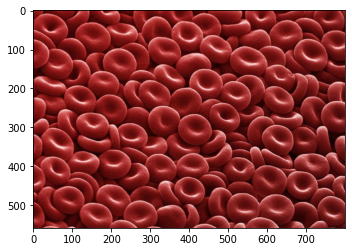

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp
from PIL import Image
import cv2

image_path = "/media/Blood-cells_12.Red-blood-ce.jpg"

f1 = mp.imread(image_path)
plt.imshow(f1)


Converting the Image to Grayscale  

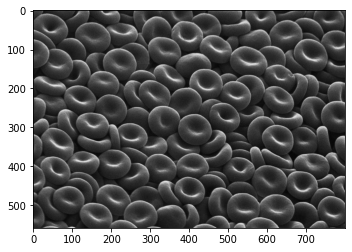

In [ ]:

col = Image.open(image_path)
gray_im = col.convert('L')

plt.imshow(gray_im, cmap="gray", vmin=0, vmax=255)


Convert to Binary using Tresholding 

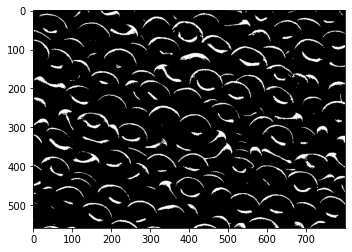

In [ ]:
img = cv2.imread(image_path,0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

# global thresholding

#For Red Blood Cells 
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

#For Neurons 
#ret1,th1 = cv2.threshold(img,225,255,cv2.THRESH_BINARY) 

plt.imshow(th1, cmap="gray", vmin=0, vmax=255)

Performing Dialation 

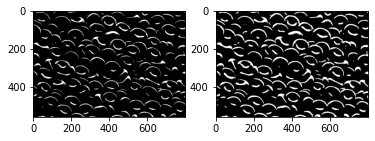

In [ ]:
kernel = np.ones((3,3),np.uint8)

dilate = cv2.dilate(th1,kernel,iterations = 1)
plt.figure; plt.subplot(1,2,1); plt.imshow(th1, cmap = 'gray'); 
plt.subplot(1,2,2); plt.imshow(dilate, cmap = 'gray')

Followed by Erosion ...

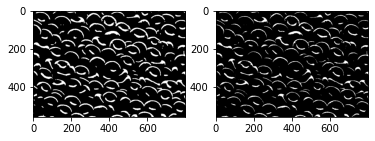

In [ ]:

erosion = cv2.erode(dilate,kernel,iterations = 1)
plt.figure; plt.subplot(1,2,1); plt.imshow(dilate, cmap = 'gray'); 
plt.subplot(1,2,2); plt.imshow(erosion, cmap = 'gray')



Blurring the image for any noise , then applying connected components to count the objectfs 

objects number is: 207


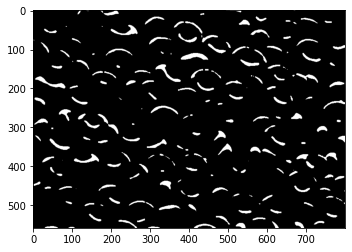

In [ ]:
img_processed = cv2.medianBlur(erosion, 7)
ret, labels = cv2.connectedComponents(img_processed)
print('objects number is:', ret-1)
plt.imshow(img_processed, cmap = 'gray')